### Implementing Linear Regression using Keras

In [29]:
# import libraries
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing,

In [30]:
# load data
data = pd.read_csv('IowaHousingPrices.csv')

In [31]:
# inspect first 5 rows
data.head()

,SquareFeet,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [35]:
# data details
data.shape

(1460, 2)

In [32]:
# define dependent and independent variables
squareFeet = data[['SquareFeet']].values
salePrice = data[['SalePrice']].values


In [36]:
# build our linear regression model - add dense layer,compile, optimize and define batch size and epochs
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.compile(keras.optimizers.Adam(learning_rate=0.8),'mean_squared_error')
model.fit(squareFeet,salePrice, epochs=40, batch_size=8)

Epoch 1/40
183/183 [==============================] - 1s 4ms/step - loss: 16331053056.0000
Epoch 2/40
183/183 [==============================] - 0s 3ms/step - loss: 3541840128.0000
Epoch 3/40
183/183 [==============================] - 0s 2ms/step - loss: 3184218368.0000
Epoch 4/40
183/183 [==============================] - 0s 1ms/step - loss: 3187875072.0000
Epoch 5/40
183/183 [==============================] - 0s 1ms/step - loss: 3191133440.0000
Epoch 6/40
183/183 [==============================] - 0s 1ms/step - loss: 3188961280.0000
Epoch 7/40
183/183 [==============================] - 0s 1ms/step - loss: 3193872384.0000
Epoch 8/40
183/183 [==============================] - 0s 1ms/step - loss: 3198294784.0000
Epoch 9/40
183/183 [==============================] - 0s 1ms/step - loss: 3188093952.0000
Epoch 10/40
183/183 [==============================] - 0s 1ms/step - loss: 3193798400.0000
Epoch 11/40
183/183 [==============================] - 0s 1ms/step - loss: 3211253504.0000
Epoch 1

46/46 [==============================] - 0s 1ms/step


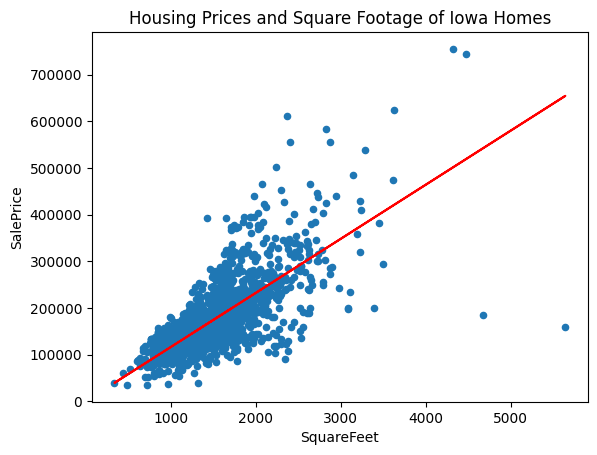

In [38]:
# plot datapoints to see how model performed

data.plot(kind='scatter',
       x='SquareFeet',
       y='SalePrice', title='Housing Prices and Square Footage of Iowa Homes')


y_pred = model.predict(squareFeet)

#Plot the linear regression line
plt.plot(squareFeet, y_pred, color='red')

In [41]:
#predict price of house of 2000 squareFeet value

squareFeet = np.array([[2000]])
predicted_price = model.predict(squareFeet)
print(f"Predicted price of a house with 2000 square feet: ${predicted_price[0][0]:,.2f}")

1/1 [==============================] - 0s 20ms/step
Predicted price of a house with 2000 square feet: $232,362.09
